In [106]:
from logging import warning

import pandas as pd
import datetime as dt
import numpy as np
import holidays
import matplotlib.pyplot as plt
from warnings import filterwarnings

from matplotlib.pyplot import axline
from xgboost.dask import predict

filterwarnings('ignore')

In [107]:
# İmport Dataset

data = pd.read_excel('../data/EVDS.xlsx')

In [108]:
dates = pd.to_datetime(data['Tarih'], format='%d-%m-%Y', errors='coerce')
data['Tarih'] = dates


days = []
for date in dates:
    hour_quarter = dt.timezone(dt.timedelta(hours=3))
    date = date.tz_localize('UTC').astimezone(hour_quarter)
    day = date.strftime('%A')
    days.append(day)

data['Day'] = days






In [109]:
miss_values =data[data['TP DK USD S YTL'].isnull()]

In [110]:
miss_values['Day'].value_counts()


Day
Saturday     22
Sunday       22
Monday        2
Tuesday       1
Wednesday     1
Friday        1
Name: count, dtype: int64

In [111]:
data.shape

(151, 3)

In [112]:
tatiller = holidays.Turkey() 

tatil = []

for date in dates:
    if date in tatiller:
        tatil.append(1)
    else:
        tatil.append(0)

data['Tatil'] = tatil




In [113]:
holidays = ['Saturday', 'Sunday']

data.loc[(~data['Day'].isin(holidays)) & (data['Tatil'] == 1)] 

,Tarih,TP DK USD S YTL,Day,Tatil
17,2024-06-17,NaN,Monday,1
18,2024-06-18,NaN,Tuesday,1
19,2024-06-19,NaN,Wednesday,1
45,2024-07-15,NaN,Monday,1
91,2024-08-30,NaN,Friday,1


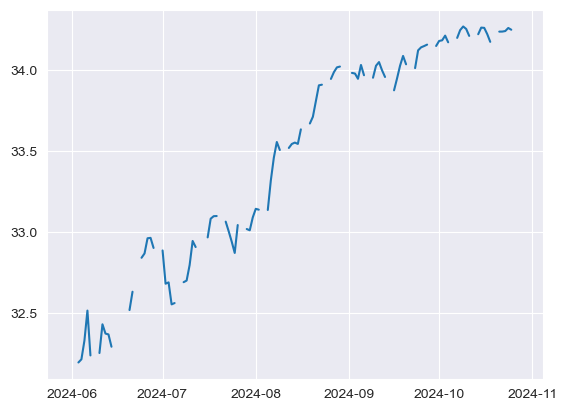

In [114]:
plt.plot(data['Tarih'], data['TP DK USD S YTL'])

In [145]:
# impuataion

predict = data['TP DK USD S YTL'].interpolate(method='linear', limit_direction='both')

data['predict'] = predict




1      32.268600
2      32.230200
8      32.240367
9      32.245333
15     32.327233
16     32.365067
17     32.402900
18     32.440733
19     32.478567
22     32.699867
23     32.769933
29     32.895700
30     32.890500
36     32.602767
37     32.645833
43     32.921425
44     32.936350
45     32.951275
50     33.086900
51     33.075300
57     33.034467
58     33.026233
64     33.137167
65     33.136533
71     33.511500
72     33.515700
78     33.647100
79     33.659200
85     33.923500
86     33.935400
91     34.013950
92     34.004100
93     33.994250
99     33.965033
100    33.959867
106    33.931867
107    33.904333
113    34.030000
114    34.022100
120    34.156867
121    34.154133
127    34.183167
128    34.192233
134    34.217167
135    34.220633
141    34.197967
142    34.219033
148    34.251400
149    34.251000
Name: TP DK USD S YTL, dtype: float64

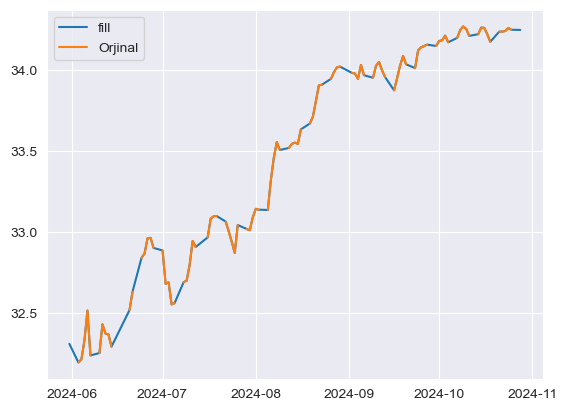

In [169]:
plt.plot(data['Tarih'], data['predict'], label='fill')
plt.plot(data['Tarih'], data['TP DK USD S YTL'], label='Orjinal')
plt.legend()
